<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsKGv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Overview

The refined code is designed to create a sophisticated knowledge graph from the text content of a webpage, specifically from "https://civichonors.com/". Here's a summary of the code and its functionalities:

1. **Installing Necessary Libraries**: The first step involves installing essential Python libraries: `requests` for fetching webpage content, `beautifulsoup4` for parsing HTML, `networkx` for creating and handling graphs, `spacy` for advanced natural language processing (NLP), and `matplotlib` for graph visualization. Additionally, the `en_core_web_sm` model of `spaCy` is downloaded for English language processing.

2. **Importing Libraries**: After the installation, the script imports these libraries into the Google Colab environment. This setup allows for various operations ranging from web scraping to graph creation and visualization.

3. **Scraping Webpage Content**: The `scrape_webpage` function retrieves the HTML content of the given URL and parses it to extract text from all paragraph tags. This function returns a concatenated string of all paragraph texts, which forms the basis for the knowledge graph.

4. **Creating the Knowledge Graph**: The `create_knowledge_graph` function employs `spaCy` for advanced NLP tasks. It loads the English language model to process the scraped text, identifying entities (like names, places, organizations) and their relationships within sentences. It then constructs a directed graph using `networkx`, where nodes represent entities, and edges represent the relationships between these entities.

5. **Saving the Graph**: The `save_graph` function saves the constructed graph in two formats: GEXF (Graph Exchange XML Format) and GraphML. These formats are compatible with various graph analysis tools and allow for further exploration of the knowledge graph.

6. **Graph Visualization**: The `visualize_graph` function uses `matplotlib` to create a visual representation of the knowledge graph. This visualization includes custom styling to enhance readability, such as node color, edge color, and labels for both nodes and edges. This step is crucial for a quick visual assessment of the graph's structure and the relationships it represents.

7. **Execution of the Process**: The code executes these functions in sequence – starting from web scraping, followed by knowledge graph creation, graph saving, and finally, visualization. This structured approach allows for a clear and systematic generation of the knowledge graph.

8. **Graph Visualization in Colab**: The final step visualizes the knowledge graph within the Google Colab notebook, allowing immediate inspection and analysis of the graph's content and structure.

In summary, this code automates the extraction of structured information from a webpage and organizes it into a knowledge graph. It demonstrates a comprehensive application of web scraping, advanced NLP, graph theory, and data visualization in Python, suitable for extracting and visualizing complex relationships from textual data.



# Step 1: Install Required Libraries

In [1]:
!pip install requests beautifulsoup4 networkx spacy matplotlib
!python -m spacy download en_core_web_sm

2023-12-16 18:24:39.198742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 18:24:39.198800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 18:24:39.200177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 18:24:39.208414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 18:24:40.695030: W tensorflow/compiler/tf2

# Step 2: Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import spacy
import matplotlib.pyplot as plt

# Step 3: Define the Web Scraping Function

In [3]:
def scrape_webpage(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = ' '.join([p.get_text() for p in soup.find_all('p')])
    return text

# Step 4: Enhance the Knowledge Graph Creation Function

In [4]:
def create_knowledge_graph(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    graph = nx.DiGraph()

    for ent in doc.ents:
        for next_ent in doc.ents:
            if ent != next_ent and ent.sent == next_ent.sent:
                graph.add_edge(ent.text, next_ent.text, relation=f'{ent.label_} to {next_ent.label_}')

    return graph

# Step 5: Define Graph Saving and Visualization Functions

In [5]:
def save_graph(graph, gexf_path, graphml_path):
    nx.write_gexf(graph, gexf_path)
    nx.write_graphml(graph, graphml_path)

def visualize_graph(graph):
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(graph, k=0.5)  # k adjusts the distance between nodes
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=10)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Knowledge Graph Visualization", fontsize=20)
    plt.show()

# Step 6: Execute the Entire Process

In [6]:
url = "https://civichonors.com/"
webpage_text = scrape_webpage(url)
knowledge_graph = create_knowledge_graph(webpage_text)
gexf_path = "/content/knowledge_graph.gexf"
graphml_path = "/content/knowledge_graph.graphml"
save_graph(knowledge_graph, gexf_path, graphml_path)

# Step 7: Visualize the Knowledge Graph

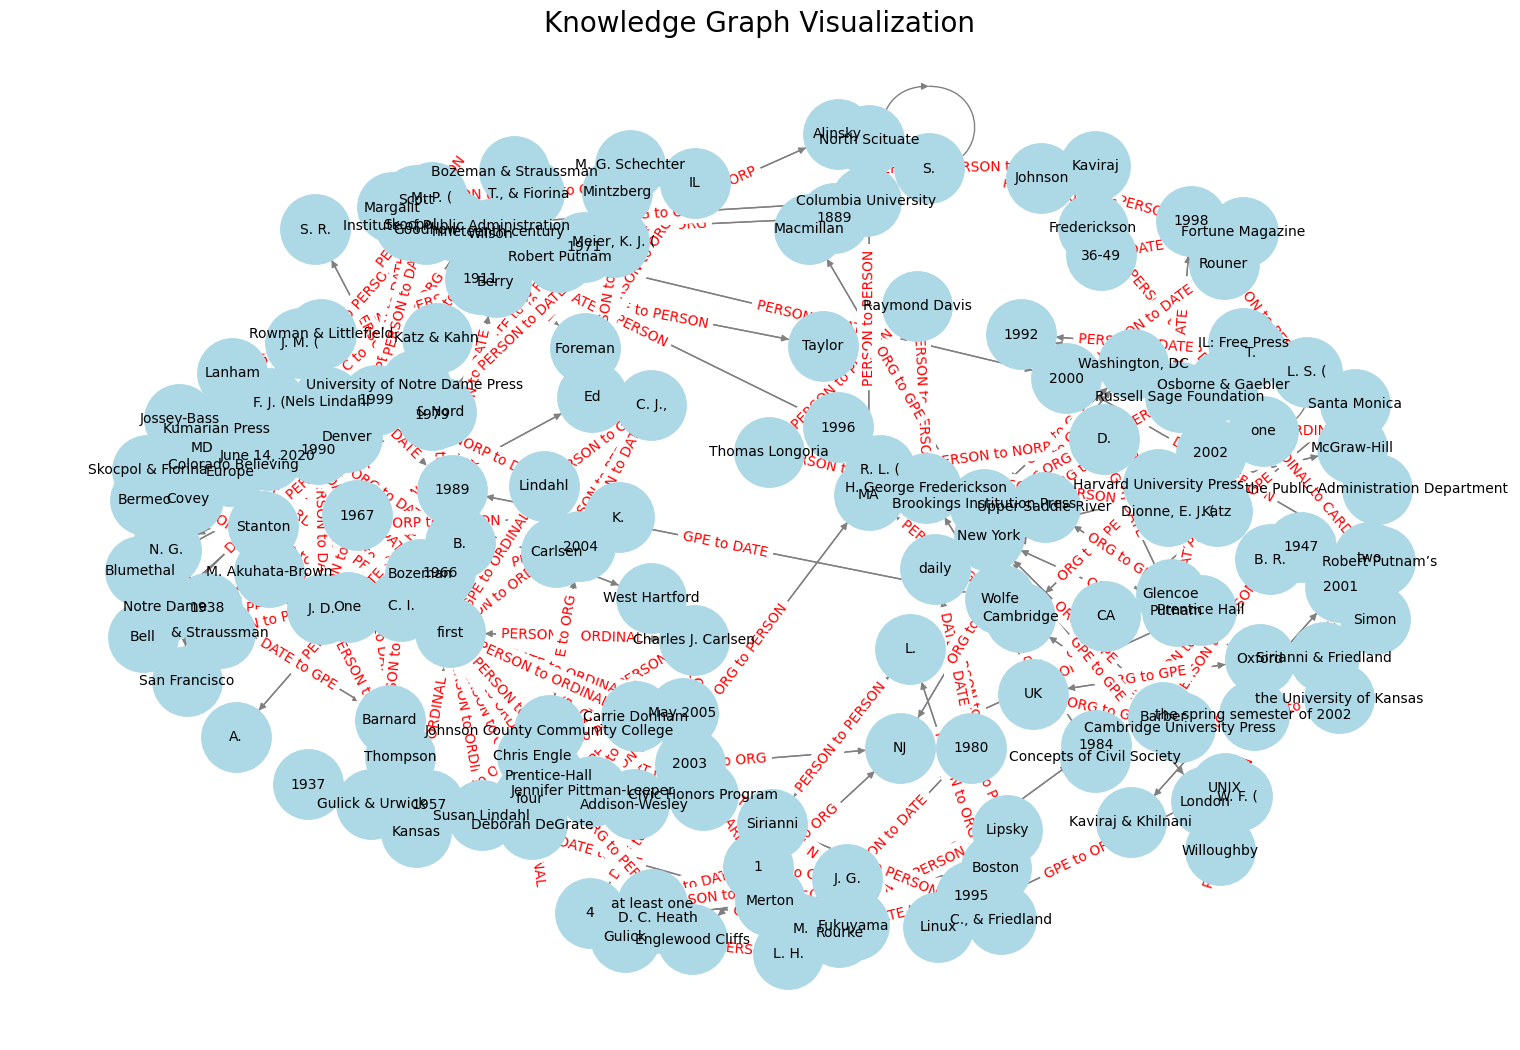

In [7]:
visualize_graph(knowledge_graph)